When getting into deep learning for the first time, you will hear a lot of common terms being thrown around. The first is Tensorflow and Pytorch. These are two competing deep learning frameworks. Tensorflow was created by the Google Brain team and Pytorch was developed by Meta AI. Each of these frameworks have their own set of pros and cons which we will not get into here[<sup id="fn1-back">1</sup>](#fn1). For the purpose of this exemplar we will be using Tensorflow. 

The second common term you will hear is Keras. Keras is an API written in python, it interfaces with many different deep learning backends and makes building models considerably easier. Thankfully, we do not need to concern ourselves with how this all works because as of Tensorflow v2, keras has been fully integrated. 

[<sup id="fn1">1</sup>](#fn1-back)For more on the pros and cons of each framework refer to this great blog post: https://www.v7labs.com/blog/pytorch-vs-tensorflow.


Now, with our new found knowledge lets see if tensorflow is installed.

In [1]:
import tensorflow as tf
print(tf.__version__)

2023-06-20 11:07:35.260604: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 11:07:35.313553: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 11:07:35.314066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 11:07:36.426099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


If everything went well with setting up the virtual environment then you should see a tensorflow version >= 2.12

Next we will import some packages that may prove to be useful later on.

In [2]:
import numpy as np 
import pylab as pl 
import seaborn as sns #pretty plots

The first thing we are going to do is fimilarise ourselves with Tensorflow. As with any programming related thing, the easiest way to do this is through example. So, we will be following a small tensorflow tutorial. The first thing we will need is some data. Luckily, tensorflow comes prepackaged with some data.


In [3]:
data = tf.keras.datasets.mnist.load_data()

This is the very popular Mnist dataset, which you may or may not have seen in other tutorials. It's a dataset of hand written numbers from 0 - 9. While that is a fairly boring dataset, it will work just fine for our purposes. 

The next think we need to do is explore the dataset: 

In [4]:
print('Type: ', type(data))
print('Shape: ', len(data))

Type:  <class 'tuple'>
Shape:  2


Okay so we know our data is a tuple with length 2. So lets extract that into its own variables (the variable names may contain spoilers for what they are). Then repeat the steps above:


In [5]:
train_data, test_data = data

print('---------Train Data-----------')
print('Type: ', type(train_data))
print('Shape: ', len(train_data))


print('---------Test Data-----------')
print('Type: ', type(test_data))
print('Shape: ', len(test_data))


---------Train Data-----------
Type:  <class 'tuple'>
Shape:  2
---------Test Data-----------
Type:  <class 'tuple'>
Shape:  2


Extract once more.....

In [6]:
x_train, y_train = train_data
x_test, y_test = test_data

print('---------Train x_data -----------')
print('Type: ', type(x_train))
print('Shape: ', len(x_train))

print('---------Train y_data -----------')
print('Type: ', type(y_train))
print('Shape: ', len(y_train))



---------Train x_data -----------
Type:  <class 'numpy.ndarray'>
Shape:  60000
---------Train y_data -----------
Type:  <class 'numpy.ndarray'>
Shape:  60000


Now we're getting somewhere! So now we can see that we have numpy arrays, with numpy arrays we use a more informative command instead of len() to see what the array looks like:

In [7]:
print('---------Train data -----------')
print('x Shape: ', x_train.shape )
print('y Shape: ', y_train.shape )

print('---------Test data -----------')
print('x Shape: ', x_test.shape )
print('y Shape: ', y_test.shape )


---------Train data -----------
x Shape:  (60000, 28, 28)
y Shape:  (60000,)
---------Test data -----------
x Shape:  (10000, 28, 28)
y Shape:  (10000,)


Now we have a picture of what our data is. We can see that the training data consists of 60000 images which are 28X28 in dimension and the test data consists of 10000 with the same dimensions. We can also see the x_data contains the images and y_data contains the labels. With this, lets use more informative variable names:

In [8]:
train_images, train_labels = x_train, y_train 
test_images, test_labels = x_test, y_test 


Now lets have a look at one of the images with the corresponding label:

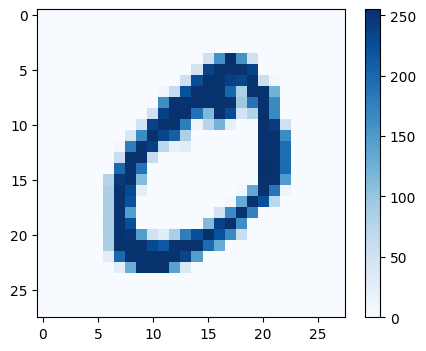

label: 0


In [9]:
cmap = sns.color_palette("Blues", as_cmap=True) #better colourmap from seaborn

image_idx = 1 #image to plot, change this number to plot different images from the training set

pl.figure(figsize = (5,4))
pl.imshow(train_images[image_idx],cmap  = cmap)
pl.colorbar()
pl.grid(False)
pl.show()
print('label:', train_labels[image_idx])

In [10]:
print('Min: ', np.min(train_images[image_idx]))
print('Max: ', np.max(train_images[image_idx]))
print('Ylabels: ', np.unique(train_labels))

Min:  0
Max:  255
Ylabels:  [0 1 2 3 4 5 6 7 8 9]


After playing around with the dataset we notice two things. The first is that the images have a flux/brightness range of 0 - 255. For optimal weight training, we need our dataset to be normalised (sometimes even standardised, depending on what you're trying to do). So lets do that now[<sup id="fn2-back">2</sup>](#fn2): *** Explain norm v std


[<sup id="fn2">2</sup>](#fn2-back) Remember that everything you do to the training set, you must also do to the test set. 

In [11]:
train_images = train_images/255.
test_images = test_images/255. 

print('Min: ', np.min(train_images[image_idx]))
print('Max: ', np.max(train_images[image_idx]))

Min:  0.0
Max:  1.0


The second thing we notice is that the labels range from 0 - 9. We are trying to classify each of the images into one of these types. However, having the labels in this form will not work for the easy model we will be using. We need our labels to be binary. The most common way to change categorical labels into binary labels is called One-Hot Encoding[<sup id="fn3-back">3</sup>](#fn3). Our data has 10 categorys, therefore we can represent it as a 10 digit binary label, with all digits except for one being 0. Lets have a look at some examples:




[<sup id="fn3">3</sup>](#fn3-back) For more on One-Hot encoding see: https://towardsdatascience.com/how-and-why-performing-one-hot-encoding-in-your-data-science-project-a1500ec72d85

In [12]:
num_classes = 10

label = 7 #change this number to see different binary representations


print('Label:  ',label)
print('Binary: ',tf.keras.utils.to_categorical(label, num_classes))

Label:   7
Binary:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [13]:
# convert class vectors to binary class matrices - this is for use in the categorical_crossentropy loss

train_labels = tf.keras.utils.to_categorical(y_train, num_classes)
test_labels = tf.keras.utils.to_categorical(y_test, num_classes)

Now we have everything we need to move onto building the network. Tensorflow makes this really easy and intuitive. All we need to build a network is to know what our architecture is going to be then add each layer line by line. An example of this is shown below. 

In [14]:
def make_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                     activation='relu',
                     input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model